In [4]:
with open('epoch_data.txt', 'r') as f:
    data = [ln.strip() for ln in f if 'BLEU' in ln]

for ln in data:
    print(ln)

Epoch 000: valid_loss 2.28 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 9.8 | BLEU 13.184
Epoch 001: valid_loss 2.02 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 7.51 | BLEU 19.421
Epoch 002: valid_loss 1.91 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.76 | BLEU 20.720
Epoch 003: valid_loss 1.87 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.47 | BLEU 20.593
Epoch 004: valid_loss 1.83 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.25 | BLEU 19.545
Epoch 005: valid_loss 1.81 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.08 | BLEU 19.264
Epoch 006: valid_loss 1.81 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 6.13 | BLEU 17.614
Test set results: BLEU 13.905
a3_task1_base.out:Final Test Set Results: BLEU 13.91
a3_task1_base.out:BLEU score: 15.27
Epoch 000: valid_loss 2.39 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 10.9 | BLEU 10.160
Epoch 001: valid_loss 2.11 | num_tokens 18 | batch_size 5e+03 | valid_perplexity 8

In [5]:
print(len(data))

30


So we have 30 entries and we know that all 3 types are represented, so we can split by 3.

In [7]:
base = data[:10]
mqa = data[10:20]
spe = data[20:30]

In [29]:
import re
def process(data):
    results = {
        'valid_perplexity': [],
        'bleu': [],
        'valid_loss': []
    }
    for entry in data:
        if 'Epoch' in entry:
            tmp = re.split(r"[:|]", entry)
            tmp = [ln.strip() for ln in tmp]
            valid_loss = float(tmp[1].split(' ')[1])
            valid_perplexity = float(tmp[4].split(' ')[1])
            bleu = float(tmp[-1].split(' ')[1])
            results['valid_perplexity'].append(valid_perplexity)
            results['bleu'].append(bleu)
            results['valid_loss'].append(valid_loss)
    return results

structured = {
    'base': process(base),
    'mqa': process(mqa),
    'spe': process(spe)
}

In [30]:
import matplotlib.pyplot as plt
def plot(metric, spe, mqa, base):
    x = range(len(base))
    # Plot
    plt.plot(x, spe, marker='o', label='SPE')
    plt.plot(x, mqa, marker='o', label='MQA')
    plt.plot(x, base, marker='o', label='BASE')

    # Labels and title
    plt.xlabel('Epoch')
    plt.ylabel(f'{metric}')
    plt.legend()
    plt.grid(True)
    # Show the plot
    plt.show()

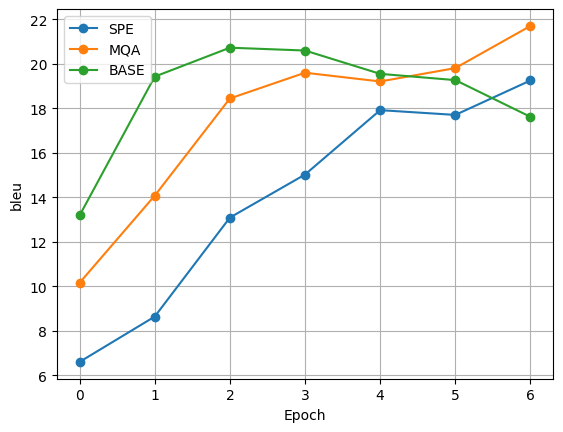

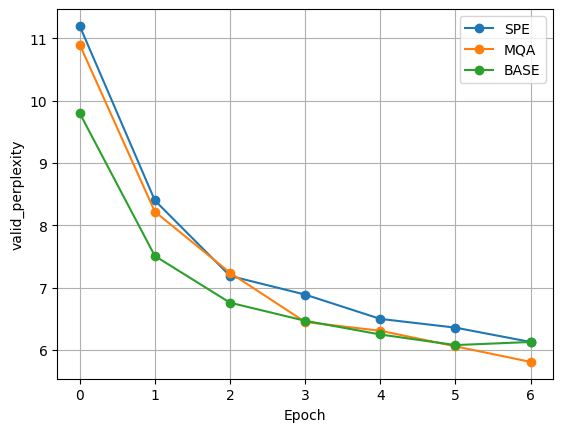

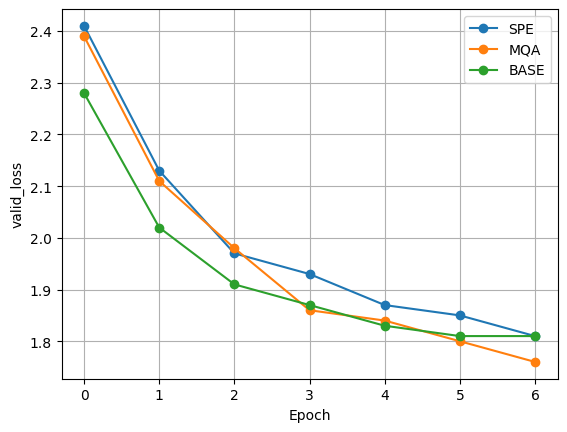

In [31]:
for metric in ['bleu', 'valid_perplexity', 'valid_loss']:
    plot(metric, structured['spe'][metric], structured['mqa'][metric], structured['base'][metric])

In [33]:
!cat inference.txt

a3_task1_base.out:[2025-11-06 09:31:47] Translation completed in 768.89 seconds
a3_task1_mqa.out:[2025-11-07 11:12:47] Translation completed in 702.43 seconds
a3_task1_spe.out:[2025-11-07 11:26:11] Translation completed in 729.38 seconds


In [11]:
import re
with open('training.txt', 'r') as f:
    data = [ln.strip() for ln in f]

structured = {
    'base': [],
    'mqa': [],
    'spe': [],
}

prefix='a3_task1_'
pat = r'(\d+\.\d+) seconds$'
for ln in data:
    found = re.search(pat, ln).group(1)
    for k in structured.keys():
        if prefix+k in ln:
            structured[k].append(float(found))

In [15]:
for k, v in structured.items():
    print(f'{k}: {(sum(v)/len(v)/60):.2f}')

base: 162.60
mqa: 157.98
spe: 158.64
